This is the first, simple demonstration of the development version of this code.

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import libst

Show propagating wave.

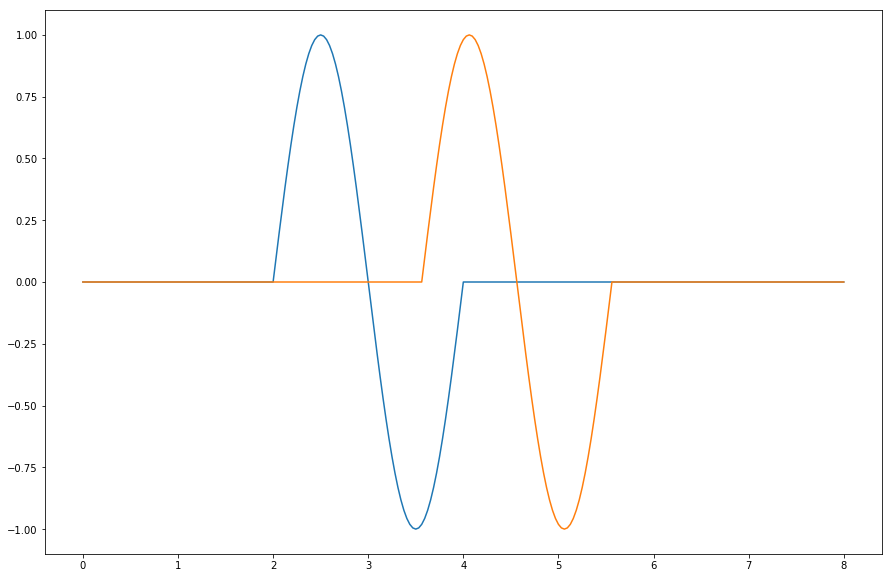

In [2]:
grid = libst.Grid(0, 4*2*np.pi, 4*64)
cfl = 1
dx = (grid.xmax - grid.xmin) / grid.ncelm
dt = dx * cfl
svr = libst.LinearScalarSolver(grid=grid, time_increment=dt)

# Initialize
for e in svr.selms(odd_plane=False):
    if e.xctr < 2*np.pi or e.xctr > 2*2*np.pi:
        v = 0
        dv = 0
    else:
        v = np.sin(e.xctr)
        dv = np.cos(e.xctr)
    e.set_so0(0, v)
    e.set_so1(0, dv)
    
plt.figure(figsize=(15,10))
plt.plot(svr.xctr() / np.pi, svr.get_so0(0).ndarray, '-')

svr.setup_march()
svr.march_alpha2(50)
plt.plot(svr.xctr() / np.pi, svr.get_so0(0).ndarray, '-')

Capture a shock in the inviscid Burgers equation ($u_t + uu_x = 0$).  (I haven't validated the solver yet.)

In [3]:
res = 32
xcrd = np.arange(res+1) / res * 2 * np.pi

time_stop = 2*np.pi

grid = libst.Grid(xcrd)
cfl_max = 1.0
dx = (grid.xmax - grid.xmin) / grid.ncelm
dt_max = dx * cfl_max
nstep = int(np.ceil(time_stop / dt_max))
dt = time_stop / nstep
cfl = dt / dx

svr = libst.InviscidBurgersSolver(grid=grid, time_increment=dt)

# Initialize
svr.set_so0(0, np.sin(svr.xctr()))
svr.set_so1(0, np.cos(svr.xctr()))

def animate(nsteps):
    fig, ax = plt.subplots(figsize=(15,10))

    ax.set_xlim((svr.selm(0).x/np.pi, svr.selm(svr.grid.ncelm).x/np.pi))
    ax.set_ylim((-1.2, 1.2))
    ax.grid()

    line, = ax.plot([], [], "+-")

    def init():
        svr.setup_march()
        line.set_data(svr.xctr()/np.pi, svr.get_so0(0))
        return (line,)

    def animate(i):
        if i != 0:
            svr.march_alpha2(1)
        line.set_data(svr.xctr()/np.pi, svr.get_so0(0))
        return (line,)

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=nsteps+1, interval=100,
                                   blit=True)
    return HTML(anim.to_jshtml())
            
#animate(20) # Don't check in the animation to git, since it's big.